In [ ]:
pip install ISLP

# Imports for resampling methods

In [2]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, sklearn_sm)

from sklearn.model_selection import (train_test_split, cross_validate, KFold)

# Validation-set approach

In [3]:
# load the Auto dataset using load_data function
dataset = load_data('Auto')
dataset.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


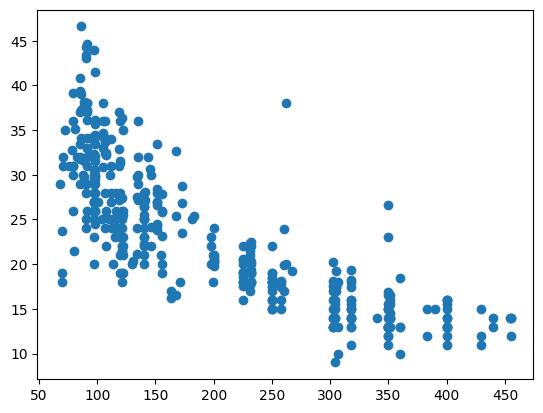

In [7]:
# visualize or analyze
import matplotlib.pyplot as plt
plt.scatter(dataset.displacement, dataset.mpg)
plt.show()

In [8]:
predictors = dataset.columns.drop(['mpg', 'name'])
print(predictors)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')


In [10]:
design = MS(predictors)
X = design.fit_transform(dataset)
X.head()

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130,3504,12.0,70,1
1,1.0,8,350.0,165,3693,11.5,70,1
2,1.0,8,318.0,150,3436,11.0,70,1
3,1.0,8,304.0,150,3433,12.0,70,1
4,1.0,8,302.0,140,3449,10.5,70,1


In [11]:
y = dataset.mpg
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [12]:
X.describe()

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.0,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,0.0,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,1.0,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,1.0,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,1.0,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,1.0,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,1.0,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
# split the data into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=6, shuffle=True)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(313, 8)
(313,)
(79, 8)
(79,)


In [30]:
model = sm.OLS(y_train, X_train) # create the model
results = model.fit() # train the model
summarize(results)

,coef,std err,t,P>|t|
intercept,-15.2947,5.302,-2.885,0.004
cylinders,-0.7435,0.375,-1.982,0.048
displacement,0.0328,0.009,3.616,0.000
horsepower,-0.0193,0.017,-1.158,0.248
weight,-0.0073,0.001,-8.800,0.000
acceleration,0.1080,0.114,0.944,0.346
year,0.7398,0.057,12.901,0.000
origin,1.4572,0.325,4.490,0.000


In [31]:
# test the model using the test data
y_hat = results.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

10.148601621119136

# Cross-validation approach

We will practice K-Fold and LOOCV (Usually with these we lose model interpretation)

In [41]:
cv_model = sklearn_sm(sm.OLS) # Create the model and get it ready for several copies
k = 5 # number of folds
cv = KFold(n_splits=k, shuffle=True, random_state=6)
results2 = cross_validate(cv_model, X, y, cv=cv)
results2

{'fit_time': array([0.0129776 , 0.00169516, 0.00902724, 0.00231671, 0.00204825]),
 'score_time': array([0.00149345, 0.00095153, 0.00133395, 0.00175166, 0.00125527]),
 'test_score': array([10.14860162, 11.55296012, 10.00583393,  9.52260145, 18.08989691])}

In [43]:
results2['test_score']

array([10.14860162, 11.55296012, 10.00583393,  9.52260145, 18.08989691])

In [44]:
np.mean(results2['test_score'])

11.863978806416327